In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drought_cities = pd.read_csv('./data/drought_cities.csv')

In [3]:
drought_cities.head()

,Name,state,ValidStart,ValidEnd,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,population_d0,population_d1,population_d2,population_d3,population_d4,DSCI,total_area,total_population
0,Alaska,AK,2021-12-07,2021-12-13,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99
1,Alaska,AK,2021-11-30,2021-12-06,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99
2,Alaska,AK,2021-11-23,2021-11-29,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99
3,Alaska,AK,2021-11-16,2021-11-22,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99
4,Alaska,AK,2021-11-09,2021-11-15,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99


In [15]:
drought_cities['ValidStart']= pd.to_datetime(drought_cities['ValidStart'])
drought_cities['ValidStart'] = drought_cities['ValidStart'].dt.strftime('%m/%d/%Y')
drought_cities['ValidStart']=drought_cities['ValidStart'].astype('datetime64[ns]')

In [16]:
#creating lists for the regions
north_east = ['Connecticut','Maine',"Massachusetts",'New Hampshire','Rhode Island','Vermont','New Jersey','New York','Pennsylvania']

Midwest=['Illinois','Indiana','Michigan','Ohio','Wisconsin','Iowa','Kansas','Minnesota','Missouri','Nebraska','North Dakota','South Dakota']


West=['Arizona','Colorado','Nevada','New Mexico','Utah','Wyoming','Alaska','California','Hawaii','Oregon','Washington']

South =['Delaware','Florida','Georgia','Maryland','North Carolina','South Carolina','Virginia','West Virginia','Alabama','Kentucky','Mississippi','Tennessee','Arkansas','Louisiana','Oklahoma','Texas']

In [17]:
#function to create a dataframe for every region
def reg (r):
    regions_df=pd.DataFrame()
    for k in r:

        x=drought_cities[drought_cities['Name']==k]
        
        regions_df=pd.concat([regions_df,x],axis=0)
    return regions_df

In [27]:
# creating 4 new dataframe for every region
north_east_df=reg(north_east)
north_east_df2=north_east_df.groupby('ValidStart').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean',})
north_east_df2['Region']='north_east'
north_east_df2.reset_index(inplace=True)


Midwest_df=reg(Midwest)
midwest_df2=Midwest_df.groupby('ValidStart').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean',})
midwest_df2['Region']='Midwest'
midwest_df2.reset_index(inplace=True)


West_df=reg(West)
West_df2=West_df.groupby('ValidStart').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean',})
West_df2['Region']='west'
West_df2.reset_index(inplace=True)



South_df=reg(South)
South_df2=South_df.groupby('ValidStart').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean',})
South_df2['Region']='South'
South_df2.reset_index(inplace=True)

#saving the dataframe
north_east_df2.to_csv('./data/north_east_region.csv', index=False)
midwest_df2.to_csv('./data/midwest_region.csv', index=False)
West_df2.to_csv('./data/West_region.csv', index=False)
South_df2.to_csv('./data/South_region.csv', index=False)

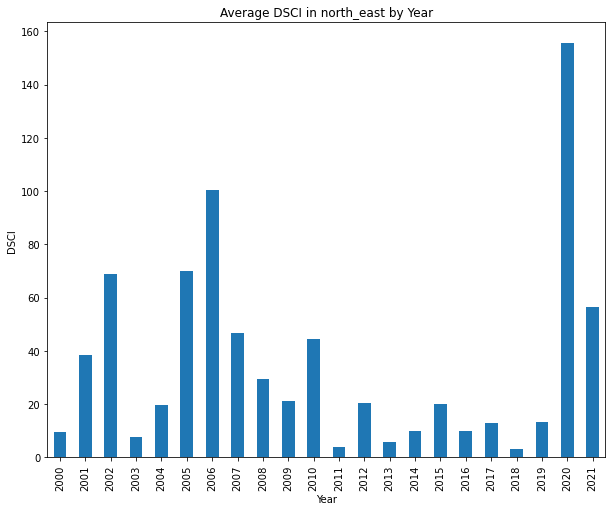

In [26]:
#function to graphic the DSCI for every region
def plot_avg_dsci(reg):
    years = reg.groupby(reg['ValidStart'].dt.year)['DSCI'].mean()
    years.plot(kind = 'bar', figsize = (10, 8))
    plt.xlabel("Year")
    plt.ylabel("DSCI")
    plt.title(f'Average DSCI in {reg["Region"].iloc[1]} by Year')
plot_avg_dsci(north_east_df2)

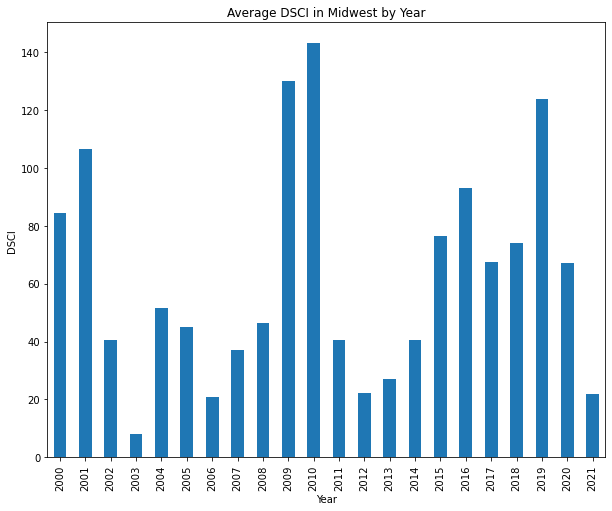

In [23]:
plot_avg_dsci(midwest_df2)

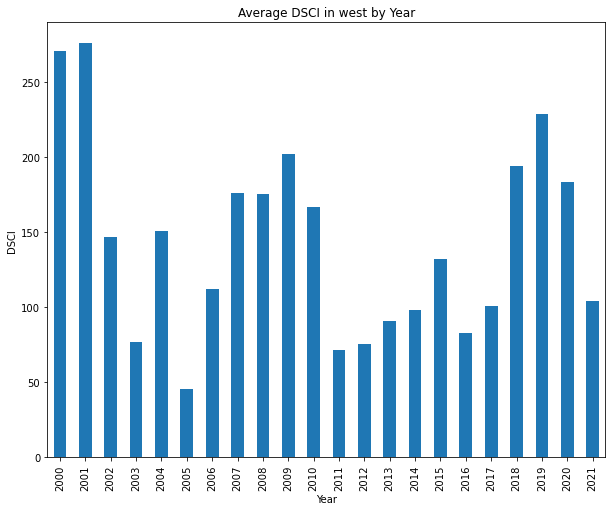

In [24]:
plot_avg_dsci(West_df2)

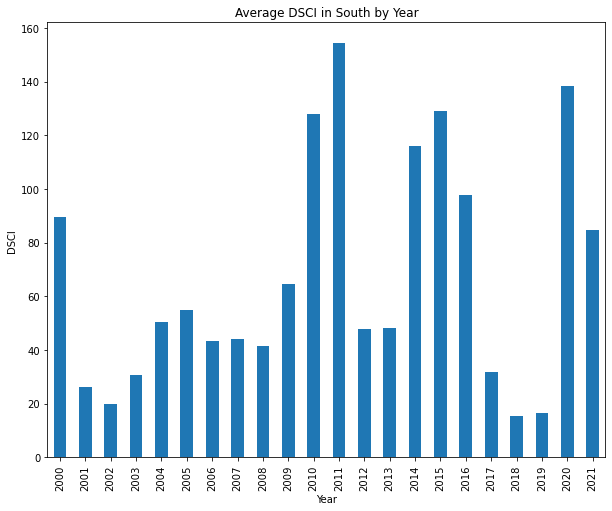

In [25]:
plot_avg_dsci(South_df2)